In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
np.random.seed(0)

Using TensorFlow backend.


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
  X_train, y_train = train_data['features'],  train_data['labels']
  
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
  X_test, y_test = test_data['features'],  test_data['labels']

with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
  X_val, y_val = val_data['features'],  val_data['labels']

(-0.5, 31.5, 31.5, -0.5)

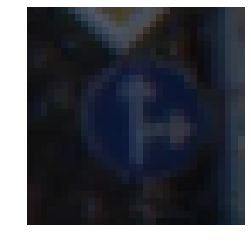

In [6]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')

In [0]:
def grayScale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img


#print(X_train[1000].shape)
img = grayScale(X_train[1000])

(-0.5, 31.5, 31.5, -0.5)

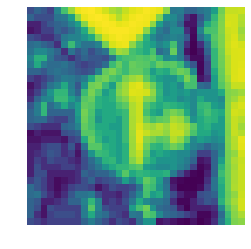

In [8]:
def equalize(img):
  return cv2.equalizeHist(img)

img = equalize(img)
plt.imshow(img)
plt.axis('off')

In [0]:
def preprocess(img):
  img = grayScale(img)
  img = equalize(img)
  return img/255

X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

X_train = X_train.reshape(len(X_train), 32, 32, 1)
X_test = X_test.reshape(len(X_test), 32, 32, 1)
X_val = X_val.reshape(len(X_val), 32, 32, 1)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    shear_range=0.1,
                                    rotation_range=10)
data_generator.fit(X_train)

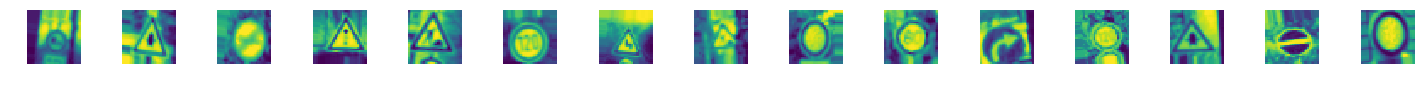

In [11]:
batches = data_generator.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig,axs = plt.subplots(1, 15, figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def network_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
model = network_model()
hist = model.fit_generator(data_generator.flow(X_train, y_train, batch_size=50), 
                           steps_per_epoch=4000,
                           epochs=10, 
                           validation_data=(X_val, y_val), 
                           shuffle=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4000/4000 [==============================] - 115s 29ms/step - loss: 0.5407 - acc: 0.8388 - val_loss: 0.0653 - val_acc: 0.9810
Epoch 2/10
4000/4000 [==============================] - 108s 27ms/step - loss: 0.1212 - acc: 0.9621 - val_loss: 0.0353 - val_acc: 0.9889
Epoch 3/10
4000/4000 [==============================] - 110s 28ms/step - loss: 0.0833 - acc: 0.9742 - val_loss: 0.0453 - val_acc: 0.9884
Epoch 4/10
4000/4000 [==============================] - 111s 28ms/step - loss: 0.0662 - acc: 0.9801 - val_loss: 0.0252 - val_acc: 0.9950
Epoch 5/10
4000/4000 [==============================] - 111s 28ms/step - loss: 0.0569 - acc: 0.9831 - val_loss: 0.0292 - val_acc: 0.9937
Epoch 6/10
4000/4000 [==============================] - 112s 28ms/step - loss: 0

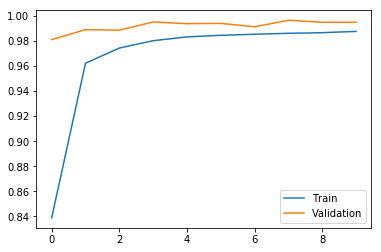

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Train', 'Validation'])

In [16]:
score = model.evaluate(X_test, y_test)

12630/12630 [==============================] - 2s 164us/step


In [17]:
print('Acc: ', score[1])

Acc:  0.9753760886966285


(32, 32)
predicted sign: [13]


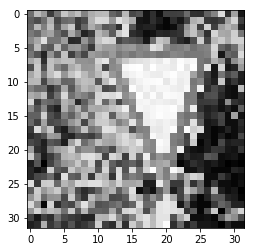

In [18]:
import requests
from PIL import Image
#url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
#url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
#url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))